Bolded text = **do not change**

Italics text = *replace with your own words*


******************
*******************

# **Description of data**

*The dataset I chose shows student performance scores in math, reading, and writing. It also shows qualitative/categorical information about the students that might affect their scores. I plan to see if I can predict performance scores for students based on some of these categorical variables, such as parental level of education and test preparation course.*

*******************
*******************
# **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


*******************
*******************
# **Functions used in notebook**

*If you write a function to help with any of your sections, please put that function here*

In [ ]:
# Functions that you develop

*******************
*******************
# **Getting data**

*load in data with pd.read_csv, show head and tail of dataset, show summary and statistics of dataset*

In [ ]:
# Code for acquiring data
data = pd.read_csv('StudentsPerformance.csv')

In [ ]:
# Display first 5 rows of data
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Display last 5 rows of data
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
# Show data.info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# Show data.describe
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


***************
***************
# **Visualizing data**

*Provide relevant pseudocode*

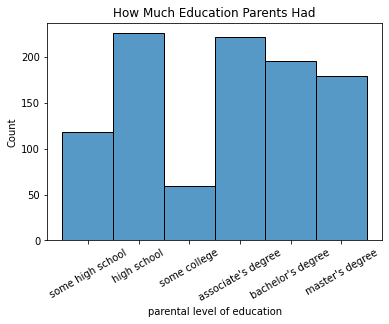

In [ ]:
# visualization 1 - histogram of parental level of education

parent_ed_hist = sns.histplot(data['parental level of education'])
plt.title('How Much Education Parents Had')

# rotate xtick labels
parent_ed_hist.set_xticklabels(labels=['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"], rotation= 30)

# show histogram
plt.show()

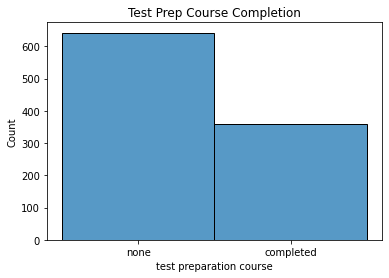

In [ ]:
# visualization 2 - histogram of test prep course completion

sns.histplot(data['test preparation course'])
plt.title('Test Prep Course Completion')
plt.show()

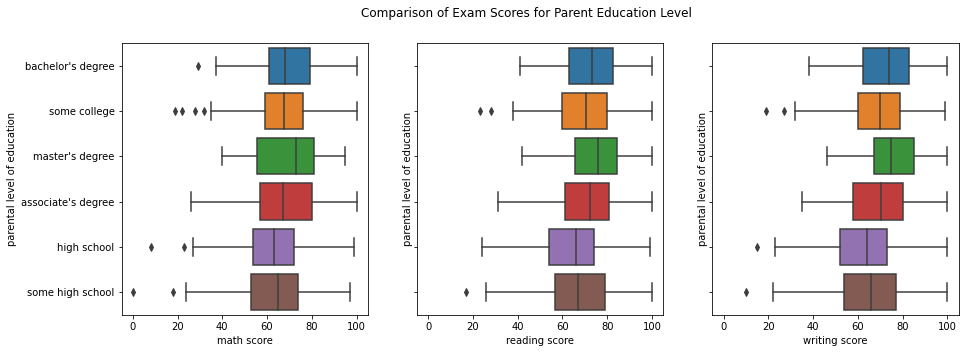

In [ ]:
# visualization 3 - boxplot of parental level of education with different scores

fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize = [15, 5])

sns.boxplot(y= 'parental level of education', x= "math score", data=data,  orient='h' , ax=axes[0])
sns.boxplot(y= 'parental level of education', x= "reading score", data=data,  orient='h' , ax=axes[1])
sns.boxplot(y= 'parental level of education', x= 'writing score', data=data, orient='h', ax=axes[2])

plt.suptitle('Comparison of Exam Scores for Parent Education Level')
plt.show()

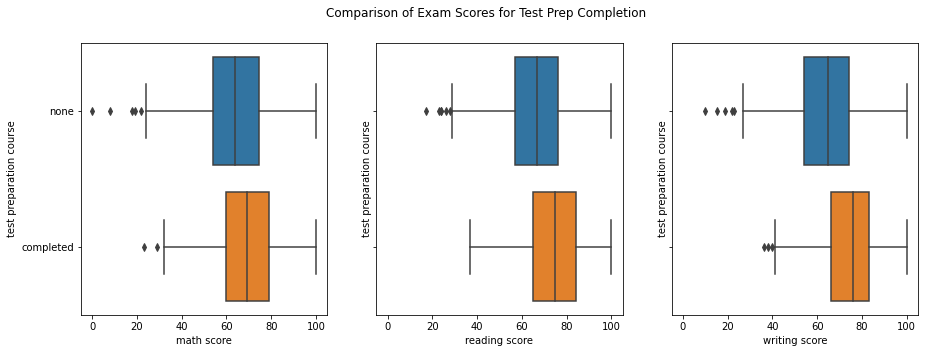

In [ ]:
# visualization 4 - boxplot of test prep course completion with different scores

fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize = [15, 5])

sns.boxplot(y= 'test preparation course', x= "math score", data=data,  orient='h' , ax=axes[0])
sns.boxplot(y= 'test preparation course', x= "reading score", data=data,  orient='h' , ax=axes[1])
sns.boxplot(y= 'test preparation course', x= 'writing score', data=data, orient='h', ax=axes[2])

plt.suptitle('Comparison of Exam Scores for Test Prep Completion')
plt.show()

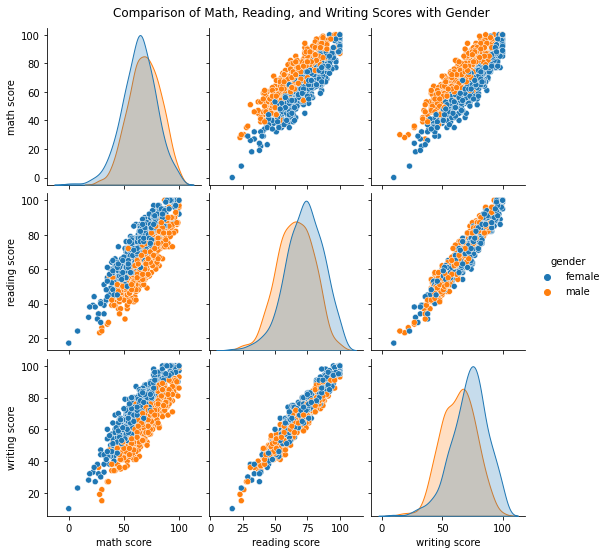

In [ ]:
# visualization 5 - pairplot of math, reading, and writing scores + scores for each gender

sns.pairplot(data, hue='gender')
plt.suptitle('Comparison of Math, Reading, and Writing Scores with Gender', y= 1.02)
plt.show()

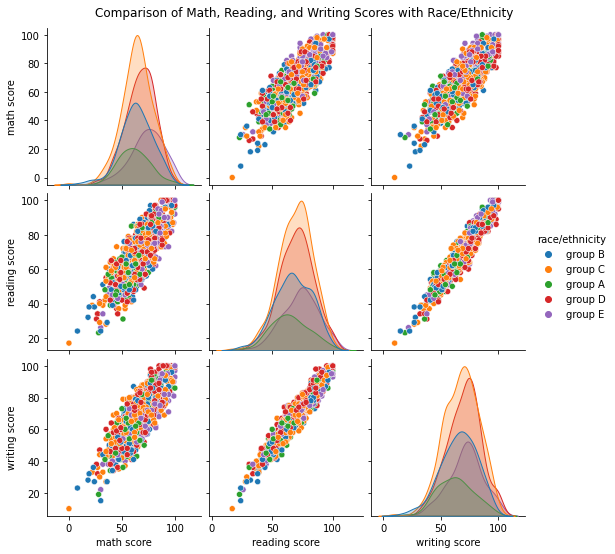

In [ ]:
# visualization 6 - pairplot of math, reading, and writing scores + scores for each race/ethnicity

sns.pairplot(data, hue='race/ethnicity')
plt.suptitle('Comparison of Math, Reading, and Writing Scores with Race/Ethnicity', y=1.02)
plt.show()

***************
***************
# **Feature Engineering**

*There are no missing data or duplicates. I will find outliers using boxplots, and remove them for parental level of education and test preparation course, since those are the variables I plan on using. I plan to dummy code all the columns to make a linear regression model and predict math, reading, and writing scores. I am dummy coding all of them so that I can easily switch between any variables I want to use if I change my mind.*

In [ ]:
# Check and take care of null values

# no missing data! data.info and data.describe show that there are 1000 entries for each columns, and they are all non-null

In [ ]:
# Check and take care of string values

# math, reading, and writing scores are all integers
# categorical columns will be dummy coded to use as integers for linear regression

In [ ]:
# Check and take care of duplicates

data.duplicated().any()

# no duplicates!

False

In [ ]:
# Check and take care of outliers

# can see outliers for parental education in visualization 3, and test prep coures in visualization 4

In [ ]:
# Any additional feature engineering

# dummy code all categorical variables

gender_df = pd.get_dummies(data['gender']) # might also include drop_first=True for all of these, but not sure
ethnicity_df = pd.get_dummies(data['race/ethnicity'])
parent_education_df = pd.get_dummies(data['parental level of education'])
lunch_df = pd.get_dummies(data['lunch'])
test_prep_df = pd.get_dummies(data['test preparation course'])

# combine dummy coded columns into one df
dummy_data = pd.concat([gender_df, ethnicity_df, parent_education_df, lunch_df, test_prep_df], axis=1)
dummy_data.head()

,female,male,group A,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,free/reduced,standard,completed,none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


1) Feature engineering: I will remove outliers from the parental level of education and test prep course columns. I will dummy code all the categorical columns, and remove outliers from remaining columns if I decide to use other columns in the analysis.

2) Analysis: I want to use linear regression to predict student scores in math, reading, and writing using parental level of education and test prep course.

***************
***************
# **Analysis section**

*Provide relevant pseudocode for linear regression or classification*

Include:

Some descriptive statistics regrading your variables of interest. For example, include the response/predictor variable mean, median, and standard deviation.

At least two analyses must be done using the machine learning techniques (i.e., where data is split into train and test) that we have used in class

If it is linear regression, then you need to provide:
1. The best fit line on a scatterplot for both the training and testing set
2. The R^2 for both the training and testing set
3. The linear equation (i.e., y = mx+b)

In [ ]:
# Machine Learning 1 - Linear Regression

model = sm.OLS(data['math score'], dummy_data[['high school', "bachelor's degree", "master's degree", 'completed']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             math score   R-squared (uncentered):                   0.546
Model:                            OLS   Adj. R-squared (uncentered):              0.544
Method:                 Least Squares   F-statistic:                              299.5
Date:                Sat, 15 May 2021   Prob (F-statistic):                   4.22e-169
Time:                        22:25:52   Log-Likelihood:                         -5240.7
No. Observations:                1000   AIC:                                  1.049e+04
Df Residuals:                     996   BIC:                                  1.051e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
high school          46.9335      3.351     14.005      0.000      40.358      53.510
bachelor's degree    48.6451      4.331     11.231      0.000      40.145      57.145
master's degree      51.7068      6.023      8.585      0.000      39.888      63.526
completed            53.2148      2.570     20.708      0.000      48.172      58.258
==============================================================================
Omnibus:                       35.155   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.669
Skew:                          -0.289   Prob(JB):                     2.67e-06
Kurtosis:                       2.470   Cond. No.                         2.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Machine Learning 2, if needed

***************
***************
# **Conclusions**

*Describe what you found and learned from your evaluation of your dataset*